In [1]:
# Import the ``ansys.dpf.core`` module
import ansys.dpf.core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operator module
import ansys.dpf.core.operators as ops

# Download and get the path to an example result file
result_file_path_1 = examples.download_piston_rod()

# Create a model from the result file
model_1 = dpf.Model(data_sources=result_file_path_1)

# Get the mesh of the model
mesh_1 = model_1.metadata.meshed_region

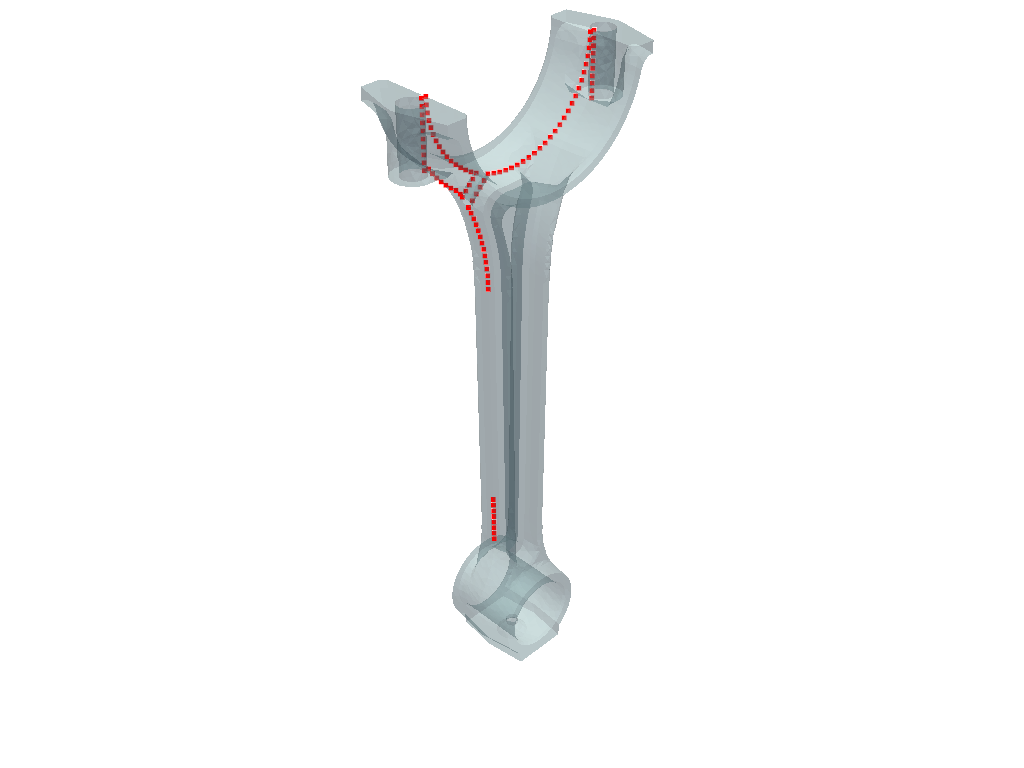

(None, <pyvista.plotting.plotter.Plotter at 0x23e9bc65ee0>)

In [2]:
# Create a scoping of the first 100 node IDs of the mesh
node_scoping = dpf.Scoping(location=dpf.locations.nodal, ids=mesh_1.nodes.scoping.ids[0:100])
# Plot the node scoping applied to the mesh, with nodes shown as red dots
node_scoping.plot(mesh=mesh_1, color="red", show_mesh=True)

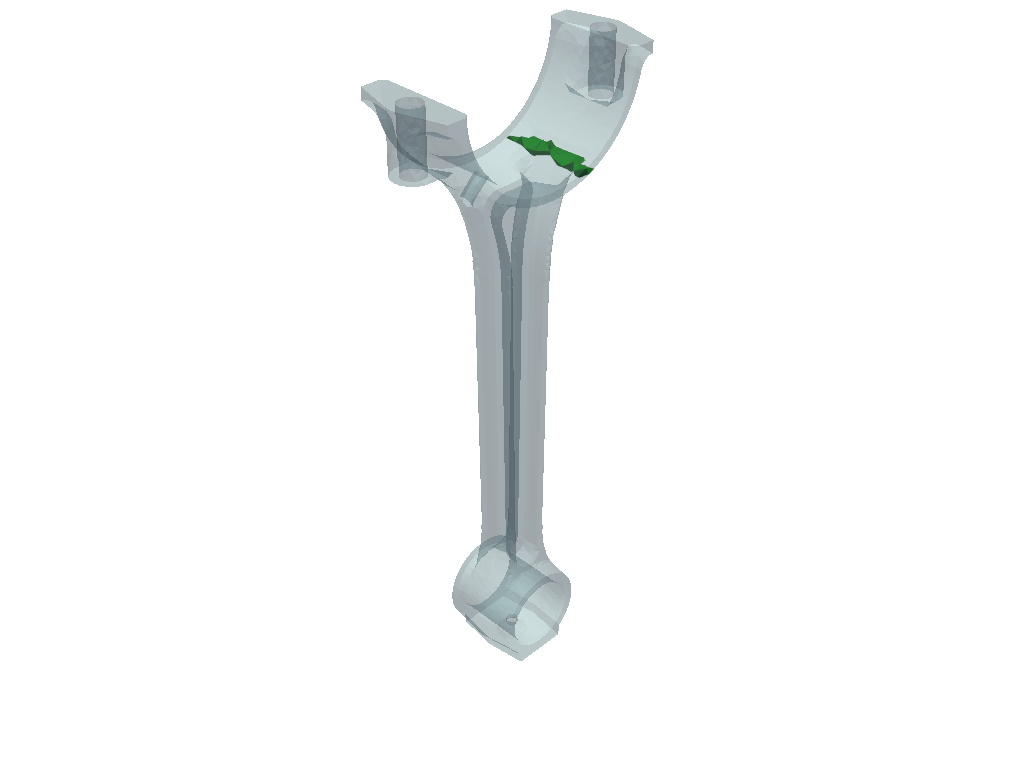

(None, <pyvista.plotting.plotter.Plotter at 0x23ecedcec00>)

In [3]:
# Create a scoping of the first 100 elements IDs of the mesh
element_scoping = dpf.Scoping(
    location=dpf.locations.elemental, ids=mesh_1.elements.scoping.ids[0:100]
)
# Plot the element scoping applied to the mesh, with elements shown in green
element_scoping.plot(mesh=mesh_1, color="green", show_mesh=True)

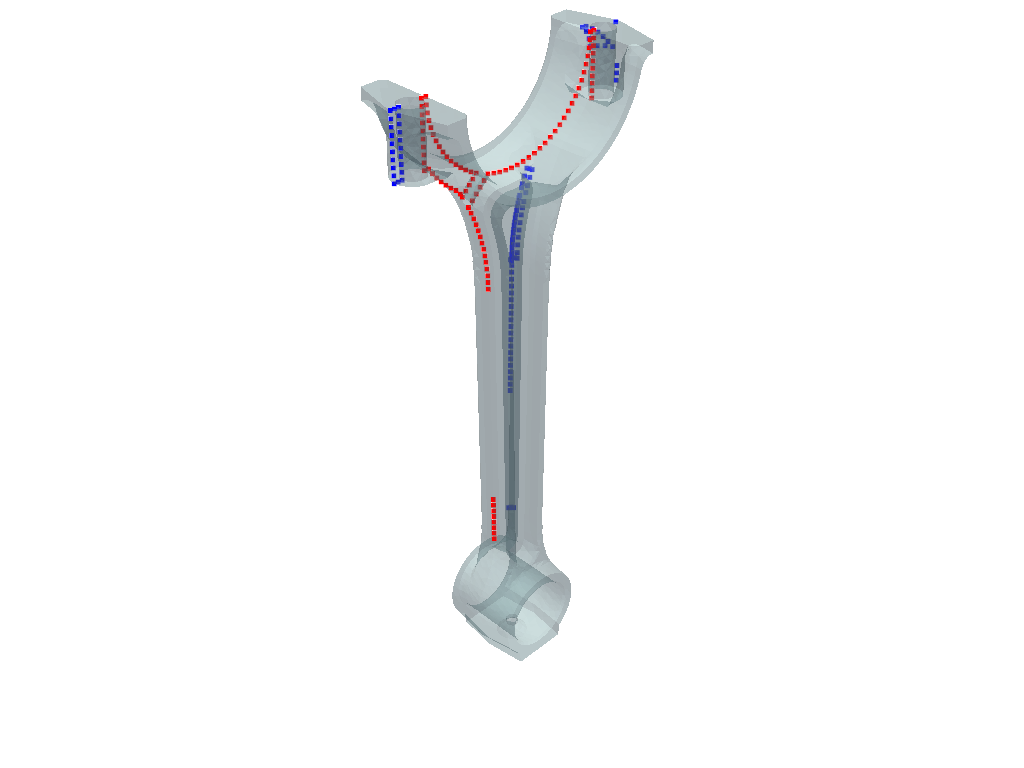

(None, <pyvista.plotting.plotter.Plotter at 0x23ecedf0da0>)

In [4]:
# Create a scoping of the first 100 node IDs of the mesh
node_scoping_1 = dpf.Scoping(location=dpf.locations.nodal, ids=mesh_1.nodes.scoping.ids[0:100])
# Create a scoping of the 300th to 400th node IDs of the mesh
node_scoping_2 = dpf.Scoping(
    location=dpf.locations.nodal, ids=mesh_1.nodes.scoping.ids[300:400]
)
# Create a ScopingsContainer
node_sc = dpf.ScopingsContainer()
# Add at least one label to the collection to identify entries
node_sc.add_label(label="scoping", default_value=1)
# Add the first node scoping to the collection
node_sc.add_scoping(label_space={"scoping": 1}, scoping=node_scoping_1)
# Add the second node scoping to the collection
node_sc.add_scoping(label_space={"scoping": 2}, scoping=node_scoping_2)
# Plot the scoping collection applied to the mesh
node_sc.plot(mesh=mesh_1, show_mesh=True)

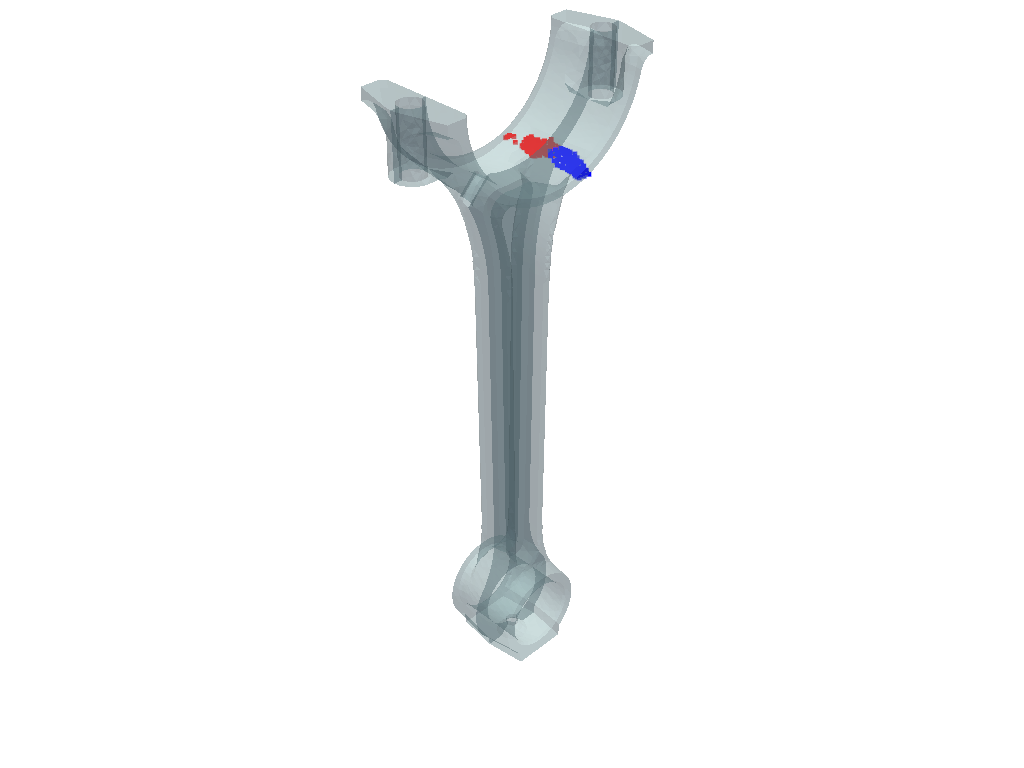

(None, <pyvista.plotting.plotter.Plotter at 0x23ecedf1850>)

In [5]:
# Create a collection of meshes based on the initial mesh by splitting it by material
meshes: dpf.MeshesContainer = ops.mesh.split_mesh(mesh=mesh_1, property="mat").eval()
# Create a node scoping targeting the first 100 node IDs of the mesh for material 1
node_scoping_3 = dpf.Scoping(
    location=dpf.locations.nodal,
    ids=meshes.get_mesh({"mat": 1, "body": 1}).nodes.scoping.ids[0:100],
)
# Create a node scoping targeting the first 100 node IDs of the mesh for material 2
node_scoping_4 = dpf.Scoping(
    location=dpf.locations.nodal,
    ids=meshes.get_mesh({"mat": 2, "body": 2}).nodes.scoping.ids[0:100],
)
# Create a collection of scopings
node_sc_2 = dpf.ScopingsContainer()
# Add the appropriate labels to the collection
node_sc_2.add_label(label="mat")
node_sc_2.add_label(label="body")
# Add the scoping associated to material 1
node_sc_2.add_scoping(label_space={"mat": 1, "body": 1}, scoping=node_scoping_3)
# Add the scoping associated to material 2
node_sc_2.add_scoping(label_space={"mat": 2, "body": 2}, scoping=node_scoping_4)
# Plot the collection of scopings applied to the collection of meshes
node_sc_2.plot(mesh=meshes)

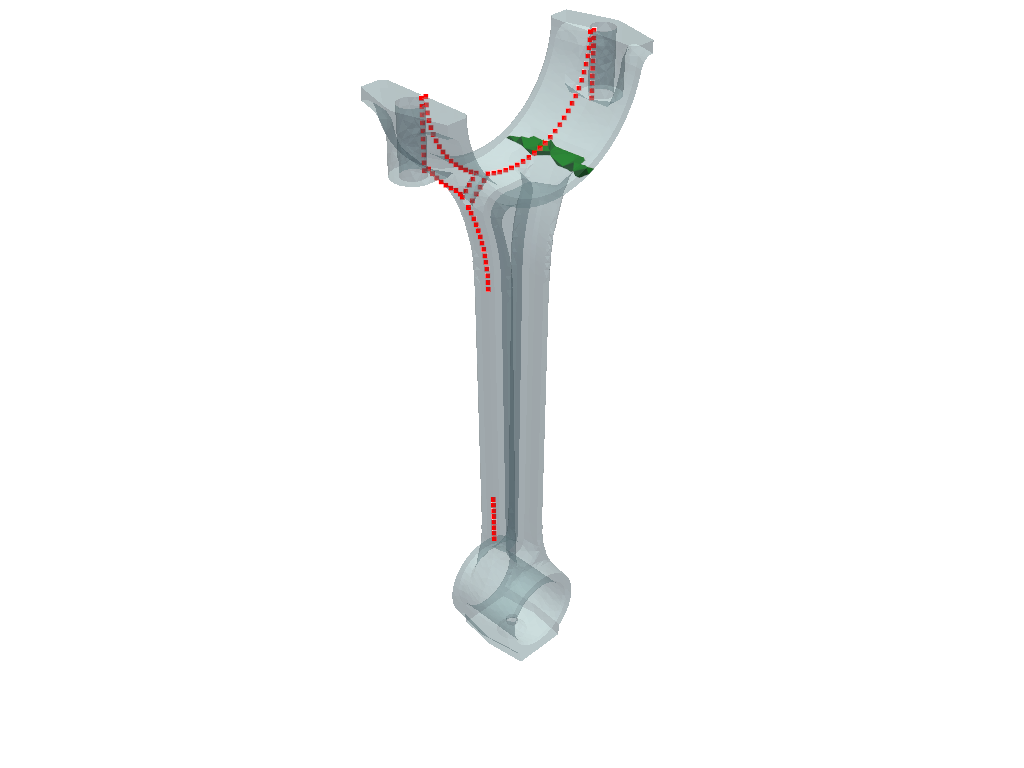

(None, <pyvista.plotting.plotter.Plotter at 0x23ecedf1250>)

In [6]:
# Create a node scoping for the first 100 node IDs of the mesh
node_scoping = dpf.Scoping(location=dpf.locations.nodal, ids=mesh_1.nodes.scoping.ids[0:100])
# Create an element scoping for the first 100 elements IDs of the mesh
element_scoping = dpf.Scoping(
    location=dpf.locations.elemental, ids=mesh_1.elements.scoping.ids[0:100]
)

# Import the DpfPlotter
from ansys.dpf.core.plotter import DpfPlotter

# Instantiate a DpfPlotter
plt = DpfPlotter()
# Tell the plotter to also show the mesh associated with the first scoping
plt.add_scoping(node_scoping, mesh_1, show_mesh=True, color="red")
# Do not show the mesh for the second scoping as it is the same
plt.add_scoping(element_scoping, mesh_1, color="green")
# Show the resulting scene
plt.show_figure()